In [1]:
# current ADAM resnet18 with 200 epochs is 76% accuracy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
from numpy import asarray
import PIL.Image as Image
import torch.nn as nn
import tqdm
import gc

device = "cuda"

torch.cuda.empty_cache()
gc.collect()
        
import torchvision.transforms as transforms
transform = transforms.ToTensor()

In [2]:
# get dataset stuffs
import torchvision
from torch.utils.data import DataLoader
from torchvision.models.utils import load_state_dict_from_url

dataset = torchvision.datasets.CIFAR10(root="based", train=False, download=True, transform=transform)
val_dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

dataset = torchvision.datasets.CIFAR10(root="based", train=True, download=True, transform=transform)

train_dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

0it [00:00, ?it/s]

Extracting based/cifar-10-python.tar.gz to based
Files already downloaded and verified


In [3]:
!pip install vit-pytorch

In [4]:
def testb():
    acc = 0
    total = 0
    for n_, (x, y) in enumerate(val_dataloader):
        x = x.to(device)
        bs = x.shape[0]
        x = x.reshape(bs, 3, 32, 32)
        
        y_hat = v(x) # add encodings?
        for _, i in enumerate(y_hat):
            if i.argmax() == y.to(device)[_]:
                acc +=1
            total +=1
            
    return acc/total

In [5]:
"""
import torch
from vit_pytorch import ViT

# get ViT-B/16 model

v = ViT(
    image_size = 32,
    patch_size = 16,
    num_classes = 10,
    dim = 768,
    depth = 12,
    heads = 12,
    mlp_dim = 3072,
    dropout = 0.1,
    emb_dropout = 0.1
)
v.eval()

# initialize stuffs
losslist_n = []
v = v.to(device)
voptimizer = torch.optim.Adam(v.parameters(), lr=.0001)
import random

acc = 0
total = 0
# do loop for baseline
for epoch in range(200):
    t = tqdm.tqdm(train_dataloader, position=0, leave=True)
    tloss = 0
    # loop over data
    for n, (x, y) in enumerate(t):
        bs = x.shape[0]
        
        # change device to gpu
        x = x.to(device)
        y = y.to(device)
        
        # forward pass
        x = x.reshape(bs, 3, 32, 32)
        f_y_hat = v(x)
        
        # backward pass
        loss = torch.nn.CrossEntropyLoss()((f_y_hat).reshape([bs, 10]), y) # nn.ReLU()
        loss.backward()
        tloss += loss
        
        # optimize
        voptimizer.step() 
        voptimizer.zero_grad()
        
        # keep track of this epoch's loss
        t.set_description_str(str(tloss.detach().cpu().numpy()/(n+1))) # 14:.2
        
    # test epoch's accuracy and append it to the list
    l = testb()
    print(l)
    losslist_n.append(l)
    
# 5 = 2 normal
# new 1.8 = 5
"""

"\nimport torch\nfrom vit_pytorch import ViT\n\n# get ViT-B/16 model\n\nv = ViT(\n    image_size = 32,\n    patch_size = 16,\n    num_classes = 10,\n    dim = 768,\n    depth = 12,\n    heads = 12,\n    mlp_dim = 3072,\n    dropout = 0.1,\n    emb_dropout = 0.1\n)\nv.eval()\n\n# initialize stuffs\nlosslist_n = []\nv = v.to(device)\nvoptimizer = torch.optim.Adam(v.parameters(), lr=.0001)\nimport random\n\nacc = 0\ntotal = 0\n# do loop for baseline\nfor epoch in range(200):\n    t = tqdm.tqdm(train_dataloader, position=0, leave=True)\n    tloss = 0\n    # loop over data\n    for n, (x, y) in enumerate(t):\n        bs = x.shape[0]\n        \n        # change device to gpu\n        x = x.to(device)\n        y = y.to(device)\n        \n        # forward pass\n        x = x.reshape(bs, 3, 32, 32)\n        f_y_hat = v(x)\n        \n        # backward pass\n        loss = torch.nn.CrossEntropyLoss()((f_y_hat).reshape([bs, 10]), y) # nn.ReLU()\n        loss.backward()\n        tloss += loss\n  

In [6]:
# load in ViT-b/16 results from the above code ran in previous version, I seperated these two in case the session was terminated and the data would be lost
losslist_n = [0.3157, 0.3891, 0.439, 0.4689, 0.477, 0.4756, 0.5138, 0.5237, 0.5193, 0.5305, 0.5254, 0.5387, 0.538, 0.5333, 0.5338, 0.537, 0.5315, 0.5291, 0.5326, 0.5311, 0.5343, 0.5281, 0.5314, 0.5348, 0.5386, 0.5441, 0.5356, 0.5313, 0.5389, 0.5413, 0.5356, 0.5364, 0.5333, 0.5355, 0.5315, 0.5379, 0.532, 0.535, 0.5357, 0.5372, 0.5377, 0.5473, 0.5449, 0.5476, 0.537, 0.54, 0.5382, 0.5447, 0.5443, 0.5383, 0.5358, 0.5437, 0.5411, 0.5445, 0.5457, 0.5427, 0.5417, 0.5376, 0.5367, 0.5335, 0.5391, 0.5463, 0.5426, 0.5446, 0.5442, 0.5437, 0.5425, 0.5407, 0.5454, 0.5453, 0.5496, 0.5428, 0.544, 0.5299, 0.5423, 0.5399, 0.5405, 0.5388, 0.5386, 0.5387, 0.5513, 0.545, 0.5419, 0.537, 0.5384, 0.5405, 0.5462, 0.5379, 0.5495, 0.55, 0.5417, 0.5526, 0.5459, 0.5427, 0.5366, 0.5468, 0.5494, 0.5487, 0.5459, 0.5411, 0.5495, 0.5474, 0.5455, 0.5498, 0.5476, 0.5476, 0.5509, 0.5454, 0.5459, 0.539, 0.545, 0.5509, 0.5467, 0.5453, 0.5409, 0.5493, 0.5422, 0.5379, 0.5439, 0.5438, 0.5488, 0.5497, 0.545, 0.5481, 0.5501, 0.5567, 0.5476, 0.5431, 0.5437, 0.5458, 0.5469, 0.5469, 0.5483, 0.5442, 0.5466, 0.5471, 0.5525, 0.546, 0.5458, 0.5472, 0.5459, 0.5471, 0.5432, 0.5493, 0.5521, 0.5455, 0.5441, 0.5422, 0.5487, 0.5507, 0.5461, 0.5522, 0.5425, 0.5502, 0.5555, 0.5563, 0.5524, 0.5537, 0.5462, 0.5571, 0.5475, 0.5464, 0.548, 0.5335, 0.5488, 0.5503, 0.5507, 0.5481, 0.5403, 0.5444, 0.5473, 0.5435, 0.5491, 0.5421, 0.5532, 0.5531, 0.5546, 0.5551, 0.5534, 0.5484, 0.5433, 0.5558, 0.5452, 0.5509, 0.5482, 0.5452, 0.5556, 0.5527, 0.5511, 0.5469, 0.5474, 0.549, 0.547, 0.5456, 0.5508, 0.5471, 0.5571, 0.5499, 0.554, 0.5525]
#print(losslist_n)

#torch.save(v.state_dict(), "v")
#torch.save(Head.state_dict(), "H")

In [7]:
def test(f):
    acc = 0
    total = 0
    # loop over test set
    for n_, (x, y) in enumerate(val_dataloader):
        bs = x.shape[0]
        x = x.to(device)
        
        # f is how many times ViT loops over data
        for i in range(f):
            x = v(x)
            x = x.reshape(bs, 3, 32, 32)
            
        # apply Head
        y_hat = Head(x)
        
        # loop over predicted and see if equal to the ground truth
        for _, i in enumerate(y_hat):
            if i.argmax() == y.to(device)[_]:
                acc +=1
            total +=1
            
    return acc/total

In [8]:
# blank module to replace nn.Softmaxes with
class make_linear(torch.nn.Module):
    def __init__(self):
        super(make_linear, self).__init__()

    def forward(self, x):
        return x

In [9]:
def replace_layers(model, old, new):
    # stolen from stack overflow, replaces all non linearities so that transformers are linear
    for n, module in model.named_children():
        if len(list(module.children())) > 0:
            ## compound module, go inside it
            replace_layers(module, old, new)
            
        if isinstance(module, old):
            ## simple module
            setattr(model, n, new)

In [10]:
import torch
from vit_pytorch import ViT

v = ViT(
    image_size = 32,
    patch_size = 16,
    num_classes = 10,
    dim = 768,
    depth = 4,
    heads = 2,
    mlp_dim = 1024,
    dropout = 0.1,
    emb_dropout = 0.1
)
v.eval()
v = torch.nn.Sequential(*(list(v.children())[:-1])) # get rid of MLP dim
# MLP dim consists of Layernorm and then activationless FC
v = torch.nn.Sequential(*(list(v.children()) + [nn.BatchNorm1d(4)])) #
#replace_layers(v, nn.Softmax, make_linear())

losslist_r = []

#Head = torch.nn.Sequential(*(list([ViT(image_size=32, patch_size=32, num_classes=10, dim=768, depth=1, heads=4, mlp_dim=3072)]))) # might want to increase head size bc the ViT is just interpresting patterns this actually makes decision
Head = torch.nn.Sequential(*(list([nn.Flatten(), nn.LayerNorm(3072), nn.Linear(3072, 10)])))


v = v.to(device)
Head = Head.to(device)

voptimizer = torch.optim.Adam(v.parameters(), lr=.0001)
hoptimizer = torch.optim.Adam(Head.parameters(), lr=.0001)
import random
loops = 2 # might need to reward not having vanishing things, right now problem is prob that numbers get smaller and smaller - actually use Batch norm

acc = 0
total = 0

for epoch in range(100):
    t = tqdm.tqdm(train_dataloader, position=0, leave=True)
    tloss = 0

    for n, (x, y) in enumerate(t):
        bs = x.shape[0]
        x = x.to(device)
        #print(x.shape)
        y = y.to(device)
        
        for i in range(loops):
            
            x = v(x)
            x = x.reshape(bs, 3, 32, 32)
            #print(x[0][0][0])
            #print(x.shape)

        f_y_hat = Head(x)
        
        loss = torch.nn.CrossEntropyLoss()((f_y_hat).reshape([bs, 10]), y) # nn.ReLU()
        loss.backward()
        tloss += loss

        hoptimizer.step() 
        hoptimizer.zero_grad()
        voptimizer.step() 
        voptimizer.zero_grad()
        
        t.set_description_str(str(tloss.detach().cpu().numpy()/(n+1))) # 14:.2
    l = test(loops)
    print(l)
    losslist_r.append(l)
        
# do hyperparam search on heads, depth and how many times to recurse

1.9304851609833387: 100%|██████████| 196/196 [00:11<00:00, 16.70it/s]


0.3977


1.5783037458147322: 100%|██████████| 196/196 [00:11<00:00, 16.59it/s]


0.4596


1.4209425011459662: 100%|██████████| 196/196 [00:11<00:00, 17.29it/s]


0.4942


1.2988349758848852: 100%|██████████| 196/196 [00:11<00:00, 16.81it/s]


0.5194


1.1864999265086895: 100%|██████████| 196/196 [00:11<00:00, 17.18it/s]


0.5379


1.078165560352559: 100%|██████████| 196/196 [00:11<00:00, 17.40it/s]


0.5443


0.9517183887715243: 100%|██████████| 196/196 [00:12<00:00, 16.31it/s]


0.5424


0.8220498221261161: 100%|██████████| 196/196 [00:11<00:00, 17.36it/s]


0.5506


0.67532052799147: 100%|██████████| 196/196 [00:12<00:00, 16.06it/s]


0.5485


0.5259933082424865: 100%|██████████| 196/196 [00:11<00:00, 17.29it/s]


0.5449


0.3844594371562101: 100%|██████████| 196/196 [00:12<00:00, 15.45it/s]


0.5384


0.25966381540103833: 100%|██████████| 196/196 [00:11<00:00, 17.01it/s]


0.5494


0.18778337751116073: 100%|██████████| 196/196 [00:11<00:00, 17.28it/s]


0.5431


0.13627020193606007: 100%|██████████| 196/196 [00:12<00:00, 15.91it/s]


0.5425


0.12081336001960599: 100%|██████████| 196/196 [00:11<00:00, 17.25it/s]


0.5316


0.10655369077410017: 100%|██████████| 196/196 [00:12<00:00, 15.69it/s]


0.5392


0.08308770705242546: 100%|██████████| 196/196 [00:11<00:00, 17.46it/s]


0.5403


0.06810473422614896: 100%|██████████| 196/196 [00:12<00:00, 15.70it/s]


0.5477


0.07636287261028679: 100%|██████████| 196/196 [00:11<00:00, 17.27it/s]


0.5429


0.10548131319941306: 100%|██████████| 196/196 [00:11<00:00, 17.20it/s]


0.5441


0.07439457153787418: 100%|██████████| 196/196 [00:11<00:00, 16.75it/s]


0.5472


0.06316844297915089: 100%|██████████| 196/196 [00:11<00:00, 17.31it/s]


0.5546


0.03375486695036596: 100%|██████████| 196/196 [00:12<00:00, 15.16it/s]


0.5571


0.026738001375782246: 100%|██████████| 196/196 [00:11<00:00, 17.34it/s]


0.5489


0.06923894006378796: 100%|██████████| 196/196 [00:13<00:00, 14.76it/s]


0.5349


0.1111828259059361: 100%|██████████| 196/196 [00:11<00:00, 17.49it/s]


0.541


0.057542450573979595: 100%|██████████| 196/196 [00:12<00:00, 15.75it/s]


0.5535


0.036195961796507546: 100%|██████████| 196/196 [00:11<00:00, 17.14it/s]


0.5589


0.03236800797131597: 100%|██████████| 196/196 [00:11<00:00, 17.31it/s]


0.5446


0.051380726755881796: 100%|██████████| 196/196 [00:12<00:00, 15.09it/s]


0.5497


0.0815800598689488: 100%|██████████| 196/196 [00:11<00:00, 17.38it/s]


0.5394


0.05605458240119778: 100%|██████████| 196/196 [00:13<00:00, 14.60it/s]


0.5462


0.03150389875684466: 100%|██████████| 196/196 [00:11<00:00, 17.35it/s]


0.5536


0.024813542560655242: 100%|██████████| 196/196 [00:11<00:00, 16.63it/s]


0.553


0.03847972227602589: 100%|██████████| 196/196 [00:11<00:00, 17.45it/s]


0.5443


0.07401680946350098: 100%|██████████| 196/196 [00:11<00:00, 16.67it/s]


0.5407


0.05925240808603715: 100%|██████████| 196/196 [00:13<00:00, 15.07it/s]


0.5503


0.03459126851996597: 100%|██████████| 196/196 [00:11<00:00, 17.43it/s]


0.5475


0.020790229038316375: 100%|██████████| 196/196 [00:13<00:00, 14.72it/s]


0.5545


0.016158999228964046: 100%|██████████| 196/196 [00:11<00:00, 17.11it/s]


0.556


0.03516620762494146: 100%|██████████| 196/196 [00:11<00:00, 16.91it/s]


0.5363


0.08230010830626196: 100%|██████████| 196/196 [00:13<00:00, 14.81it/s]


0.5454


0.04723064753474021: 100%|██████████| 196/196 [00:11<00:00, 16.85it/s]


0.5534


0.03535115962125817: 100%|██████████| 196/196 [00:13<00:00, 14.59it/s]


0.5539


0.025678359732335926: 100%|██████████| 196/196 [00:12<00:00, 16.01it/s]


0.5495


0.033483772861714264: 100%|██████████| 196/196 [00:12<00:00, 16.05it/s]


0.5502


0.05054748788171885: 100%|██████████| 196/196 [00:12<00:00, 15.27it/s]


0.5409


0.052287486134743204: 100%|██████████| 196/196 [00:11<00:00, 17.22it/s]


0.5462


0.04220395185509507: 100%|██████████| 196/196 [00:13<00:00, 14.06it/s]


0.5403


0.034602077639832786: 100%|██████████| 196/196 [00:11<00:00, 17.17it/s]


0.5568


0.013289584189045186: 100%|██████████| 196/196 [00:12<00:00, 15.75it/s]


0.5595


0.005615026366953947: 100%|██████████| 196/196 [00:11<00:00, 16.87it/s]


0.5699


0.0016669843878064836: 100%|██████████| 196/196 [00:11<00:00, 17.38it/s]


0.5734


0.0004728223976432061: 100%|██████████| 196/196 [00:14<00:00, 13.59it/s]


0.5747


0.002700097098642466: 100%|██████████| 196/196 [00:11<00:00, 17.16it/s]


0.569


0.035041400364467075: 100%|██████████| 196/196 [00:11<00:00, 16.58it/s]


0.5321


0.1694098102803133: 100%|██████████| 196/196 [00:11<00:00, 17.37it/s]


0.5417


0.03985445840018136: 100%|██████████| 196/196 [00:11<00:00, 16.67it/s]


0.5503


0.007813757171436233: 100%|██████████| 196/196 [00:12<00:00, 15.78it/s]


0.5645


0.0014045872554487111: 100%|██████████| 196/196 [00:11<00:00, 17.32it/s]


0.5739


0.00025360767102363156: 100%|██████████| 196/196 [00:11<00:00, 17.31it/s]


0.5746


0.00016343722842177566: 100%|██████████| 196/196 [00:11<00:00, 17.36it/s]


0.5744


0.00013200691616048618: 100%|██████████| 196/196 [00:14<00:00, 13.88it/s]


0.575


0.00011143363936215032: 100%|██████████| 196/196 [00:11<00:00, 17.27it/s]


0.5736


9.614132268696416e-05: 100%|██████████| 196/196 [00:11<00:00, 16.43it/s]


0.574


8.386089371479287e-05: 100%|██████████| 196/196 [00:11<00:00, 17.28it/s]


0.5743


7.397061384910223e-05: 100%|██████████| 196/196 [00:11<00:00, 17.49it/s]


0.5753


6.562673809881113e-05: 100%|██████████| 196/196 [00:14<00:00, 13.32it/s]


0.5751


5.847896088142784e-05: 100%|██████████| 196/196 [00:11<00:00, 17.34it/s]


0.5758


5.248801459615328e-05: 100%|██████████| 196/196 [00:11<00:00, 16.41it/s]


0.5758


4.71783450291473e-05: 100%|██████████| 196/196 [00:11<00:00, 17.29it/s]


0.5764


4.261523504190299e-05: 100%|██████████| 196/196 [00:11<00:00, 16.68it/s]


0.5766


3.829606742198978e-05: 100%|██████████| 196/196 [00:14<00:00, 13.29it/s]


0.5773


3.4618284078124833e-05: 100%|██████████| 196/196 [00:11<00:00, 16.96it/s]


0.5769


3.13226565984743e-05: 100%|██████████| 196/196 [00:11<00:00, 17.42it/s]


0.578


2.841223078798883e-05: 100%|██████████| 196/196 [00:11<00:00, 17.17it/s]


0.5779


2.5747541091119755e-05: 100%|██████████| 196/196 [00:11<00:00, 17.22it/s]


0.5784


2.3366957047612082e-05: 100%|██████████| 196/196 [00:13<00:00, 14.42it/s]


0.5779


2.117977211517947e-05: 100%|██████████| 196/196 [00:11<00:00, 17.51it/s]


0.578


1.9235100492606967e-05: 100%|██████████| 196/196 [00:11<00:00, 17.35it/s]


0.5788


1.7459743076517266e-05: 100%|██████████| 196/196 [00:11<00:00, 16.71it/s]


0.5789


1.588589226712986e-05: 100%|██████████| 196/196 [00:12<00:00, 15.43it/s]


0.5784


1.4401587410544863e-05: 100%|██████████| 196/196 [00:12<00:00, 15.41it/s]


0.5793


1.3086940066850916e-05: 100%|██████████| 196/196 [00:11<00:00, 17.34it/s]


0.579


1.1877289840153285e-05: 100%|██████████| 196/196 [00:11<00:00, 16.52it/s]


0.5795


1.0801861727876322e-05: 100%|██████████| 196/196 [00:11<00:00, 17.39it/s]


0.5794


9.80095783419603e-06: 100%|██████████| 196/196 [00:14<00:00, 13.08it/s]


0.5785


8.92009179830095e-06: 100%|██████████| 196/196 [00:11<00:00, 17.26it/s]


0.5786


8.08581921309993e-06: 100%|██████████| 196/196 [00:11<00:00, 17.29it/s]


0.5799


7.338918702752919e-06: 100%|██████████| 196/196 [00:11<00:00, 17.37it/s]


0.5794


6.658186047927154e-06: 100%|██████████| 196/196 [00:11<00:00, 17.26it/s]


0.5792


6.0503477971924814e-06: 100%|██████████| 196/196 [00:15<00:00, 12.60it/s]


0.5796


5.4836112825314e-06: 100%|██████████| 196/196 [00:11<00:00, 17.17it/s]


0.5796


4.965553300132101e-06: 100%|██████████| 196/196 [00:11<00:00, 16.87it/s]


0.5799


4.503893195556439e-06: 100%|██████████| 196/196 [00:11<00:00, 17.40it/s]


0.5798


4.086061083825723e-06: 100%|██████████| 196/196 [00:11<00:00, 16.46it/s]


0.5806


3.709720640101147e-06: 100%|██████████| 196/196 [00:15<00:00, 12.72it/s]


0.5802


3.359531175953393e-06: 100%|██████████| 196/196 [00:11<00:00, 16.79it/s]


0.5805


3.0460722307313462e-06: 100%|██████████| 196/196 [00:11<00:00, 17.32it/s]


0.5809


2.763102220713484e-06: 100%|██████████| 196/196 [00:11<00:00, 17.31it/s]


0.5807


In [11]:
test(loops)

0.5806

In [12]:
print(losslist_r)

[0.3977, 0.4596, 0.4942, 0.5194, 0.5379, 0.5443, 0.5424, 0.5506, 0.5485, 0.5449, 0.5384, 0.5494, 0.5431, 0.5425, 0.5316, 0.5392, 0.5403, 0.5477, 0.5429, 0.5441, 0.5472, 0.5546, 0.5571, 0.5489, 0.5349, 0.541, 0.5535, 0.5589, 0.5446, 0.5497, 0.5394, 0.5462, 0.5536, 0.553, 0.5443, 0.5407, 0.5503, 0.5475, 0.5545, 0.556, 0.5363, 0.5454, 0.5534, 0.5539, 0.5495, 0.5502, 0.5409, 0.5462, 0.5403, 0.5568, 0.5595, 0.5699, 0.5734, 0.5747, 0.569, 0.5321, 0.5417, 0.5503, 0.5645, 0.5739, 0.5746, 0.5744, 0.575, 0.5736, 0.574, 0.5743, 0.5753, 0.5751, 0.5758, 0.5758, 0.5764, 0.5766, 0.5773, 0.5769, 0.578, 0.5779, 0.5784, 0.5779, 0.578, 0.5788, 0.5789, 0.5784, 0.5793, 0.579, 0.5795, 0.5794, 0.5785, 0.5786, 0.5799, 0.5794, 0.5792, 0.5796, 0.5796, 0.5799, 0.5798, 0.5806, 0.5802, 0.5805, 0.5809, 0.5807]


In [13]:
torch.save(v.state_dict(), "vn")
torch.save(Head.state_dict(), "Hn")

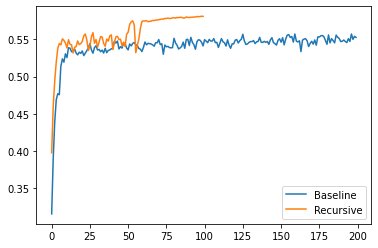

In [14]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(losslist_n))), losslist_n, label="Baseline")
plt.plot(list(range(len(losslist_r))), losslist_r, label="Recursive")
plt.legend()
plt.show()